In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import math

In [222]:
def distance(point1, point2):
    """Calculates the distance between two points.
    
    Parameters
    ----------
    point1 : array
        The x and y position of the first point.
    point2 : array
        The x and y position of the second point.

    Returns
    -------
    float
        The distance between the two points.
    """
    dist = math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)
    return dist
def find_nearest_centroid(point, centroids):
    """Finds the nearest centroid of a point.

    Parameters
    ----------
    point : array
        The x and y pos of the point.
    centroids : array
        A 2D array of the positions of the centroids.

    Returns
    -------
    int
        The index of the closest centroid.
    """
    smallest_dist = -1
    nearest_centroid_index = 0
    index = 0
    for centroid in centroids:
        dist = distance(point, centroid)
        if index == 0:
            smallest_dist = dist
        elif dist < smallest_dist:
            smallest_dist = dist
            nearest_centroid_index = index
        index += 1
    return nearest_centroid_index
def move_centroid(datapoints, centroid):
    """Moves a centroid depending on all of the datapoints in its cluster.

    Parameters
    ----------
    datapoints : array
        A 2D array of the positions of the datapoints within the centroid's cluster.
    centroid : array
        The x and y pos of the centroid.

    Returns 
    -------
    array
        The x and y pos of the moved centroid
    """
    # This is done because we don't want to divide by 0 when calculating the averages.
    if len(datapoints) is 0:
        return centroid
    else:
        x_vals = [x[0] for x in datapoints]
        y_vals = [x[1] for x in datapoints]
        x_avg = sum(x_vals)/len(datapoints)
        y_avg = sum(y_vals)/len(datapoints)
        return [x_avg, y_avg]

In [223]:
def k_means(datapoints, k, iter_cap=500):
    """Implementation of k_means clustering algorithm in python.

    Only works for datasets with two features.

    Parameters
    ----------
    datapoints : array
        2D array of x and y coordinates.
    k : int
        Number of clusters.
    iter_cap : (optional) int 
        Maximum number of iterations. Default set to 500.

    Returns
    -------
    array
        4D array containing 3D array of the timeline of centroids and 3D array of the clusters.
    """
    # select random datapoints to be centroids
    centroidIndexes = np.random.choice(len(datapoints), k, replace=False)
    centroids_iterations = []
    centroids = []
    for i in centroidIndexes:
        centroids.append(datapoints[i-1])
    centroids_iterations.append(centroids)
    # inital assigning of datapoints to centroids
    for datapoint in datapoints:
        nearest_centroid = find_nearest_centroid(datapoint, centroids)
        datapoint.append(nearest_centroid)
    centroids_changed = True
    datapoints_of_each_centroid = []
    iterations = 0
    while centroids_changed:
        iterations += 1
        centroids_changed = False
        # create an array of datapoints for each centroid
        datapoints_of_each_centroid = [[] for _ in range(k)]
        for datapoint in datapoints:
            datapoints_of_each_centroid[datapoint[2]].append(datapoint)
        # move each centroid
        i = 0
        for centroid_arr in datapoints_of_each_centroid:
            moved_centroid = move_centroid(centroid_arr, centroids[i])
            if centroids[i] != moved_centroid:
                centroids_changed = True
                centroids[i] = moved_centroid
            i += 1
        if centroids_changed:
            centroids_iterations.append(centroids)
            # reassign datapoints to moved centroids 
            for datapoint in datapoints:
                nearest_centroid = find_nearest_centroid(datapoint, centroids)
                datapoint[2] = nearest_centroid
        elif iterations > 500:
            break
    return [centroids_iterations, datapoints_of_each_centroid]

In [224]:
def plot_clusters(clusters):
    """Plots the clusters generated for a dataset.
    
    Parameters
    ----------
    clusters : array
        3D array of x and y coordinates.
    """
    for cluster in clusters:
        plt.scatter([x[0] for x in cluster], [x[1] for x in cluster])
    plt.show()
def plot_centroids_over_time(centroid_timeline, x_label='X', y_label='Y'):
    """Plots the centroids of a dataset over time.

    Parameters
    ----------
    centroid_timeline : array
        3D array of the timeline of centroids outputed from the k_means algorithm.
    """
    index = 0
    num_centroids = len(centroid_timeline[0])
    index_arr = []
    centroid_timeline = np.asarray(centroid_timeline)
    for i in range(len(centroid_timeline)):
        index_arr.append(i)
    for i in range(num_centroids):
        ax.scatter([x[0] for x in centroid_timeline[:, i]], [x[1] for x in centroid_timeline[:, i]], index_arr)
    '''for centroids in centroid_timeline:
        ax.scatter([x[0] for x in centroids], [x[1] for x in centroids], index)
        index += 1'''
    # remove tick marks 
    for axis_obj in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
        axis_obj.set_ticklabels([])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel('Iterations Over Time')     

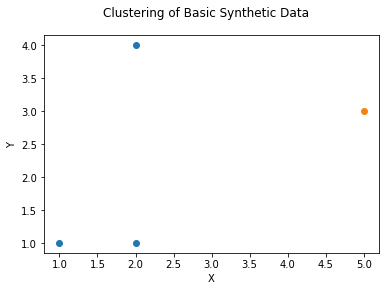

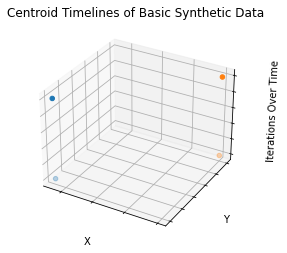

In [225]:
data = [[1, 1], [2, 4], [5, 3], [2, 1]]
results = k_means(data, 2)
centroids_timeline = results[0]
clusters = results[1]
# setup graph
fig = plt.figure() # create graph
fig.suptitle('Clustering of Basic Synthetic Data') # set title 
# set axis labels 
plt.xlabel('X')
plt.ylabel('Y')
plot_clusters(clusters)
# create 3D graph
fig_3D = plt.figure() # create graph
ax = fig_3D.add_subplot(111, projection='3d')
ax.title.set_text('Centroid Timelines of Basic Synthetic Data')
plot_centroids_over_time(centroids_timeline)

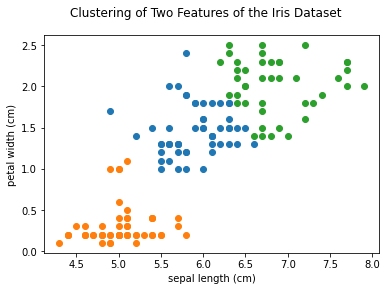

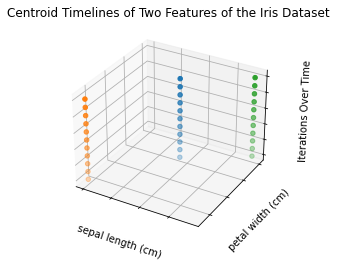

In [226]:
# get dataset 
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

# choose two features to use for clustering
x_feature = 0
y_feature = 3

pairs = iris.data[:, [x_feature, y_feature]].tolist()

# setup graphs
fig = plt.figure() # create graph
fig.suptitle('Clustering of Two Features of the Iris Dataset') # set title 
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])

results = k_means(pairs, 3) # calculate centroids and clusters
centroids_timeline = results[0]
clusters = results[1]
plot_clusters(clusters) # plot clusters

# create 3D graph
fig_3D = plt.figure()
ax = fig_3D.add_subplot(111, projection='3d')
ax.title.set_text('Centroid Timelines of Two Features of the Iris Dataset') # set title 
plot_centroids_over_time(centroids_timeline, iris.feature_names[x_feature], iris.feature_names[y_feature]) # plot centroids over time
plt.show()